In [1]:
import warnings
warnings.filterwarnings('ignore')

# Setting Up Lambda Function for Drought Monitor

In [2]:
import podpac
from podpac.managers import aws
from podpac import settings
# set logging to DEBUG to see build process
import logging
logger = logging.getLogger("podpac")
logger.setLevel(logging.DEBUG)

Choose the function and bucket names

In [3]:
settings["FUNCTION_NAME"] = "podpac-drought-monitor-lambda"
settings["S3_BUCKET_NAME"] = "podpac-drought-monitor-s3"
settings["FUNCTION_ROLE_NAME"] = "podpac-drought-monitor-role"

Load the pipelines

In [4]:
d0 = podpac.Node.from_json(open('pipeline_d0.json').read())
d1 = podpac.Node.from_json(open('pipeline_d1.json').read())
d2 = podpac.Node.from_json(open('pipeline_d2.json').read())
d3 = podpac.Node.from_json(open('pipeline_d3.json').read())
d4 = podpac.Node.from_json(open('pipeline_d4.json').read())
alg = podpac.Node.from_json(open('pipeline_category.json').read())
smap = podpac.Node.from_json(open('pipeline_moisture.json').read())
sin_coords_node = podpac.algorithm.SinCoords()
smap.hash

'4dffa6ef249bc8f74d9c5abbf043987f'

In [5]:
# Find hashes for functions to restrict capabilities on public Lambda function
hashs = [d0.hash, d1.hash, d2.hash, d3.hash, d4.hash, alg.hash, smap.hash, sin_coords_node.hash]
hashs

['358f98a50ac7ef7616ecc3381317e00c',
 '79852ffdf269a6499a1a7fa33bc06669',
 'c33218e76bc022d2db906f438491eca7',
 '414ef097cd8f7a0ee065f6c68704d109',
 '87e15d5ee882b7a0e9c73863ca2f9a06',
 '522f0c3724452665287b2871c6374643',
 '4dffa6ef249bc8f74d9c5abbf043987f',
 '1829589ba2c91ae529486b5b97f66e2f']

Make the Lambda function

In [6]:
# make lambda node that is restricted only to this node
node = aws.Lambda(function_restrict_pipelines=hashs, 
                  function_allow_unsafe_eval=True, 
                  function_tags={'owner': 'mpu',
                                 'acct': '1010115.01.003'}, 
                 function_source_bucket=settings["S3_BUCKET_NAME"],
                 function_source_dist_key='podpac_dist.zip',
                 function_triggers=['eval', 'APIGateway'],
                 function_env_variables={"S3_BUCKET_NAME": settings["S3_BUCKET_NAME"],
                                         "PODPAC_VERSION": podpac.version.semver()
                                        }                  
                 )
node.describe()


Lambda Node (staged)
    Function
        Name: podpac-drought-monitor-lambda
        Description: PODPAC Lambda Function (https://podpac.org)
        ARN: None
        Triggers: ['eval', 'APIGateway']
        Handler: handler.handler
        Environment Variables: {'S3_BUCKET_NAME': 'podpac-drought-monitor-s3', 'PODPAC_VERSION': '1.2.0'}
        Timeout: 600 seconds
        Memory: 2048 MB
        Tags: {'owner': 'mpu', 'acct': '1010115.01.003'}
        Source Dist: s3://podpac-drought-monitor-s3/podpac_dist.zip
        Source Dependencies: s3://podpac-drought-monitor-s3/dev/podpac_deps.zip
        Last Modified: None
        Version: None
        Restrict Evaluation: ['358f98a50ac7ef7616ecc3381317e00c', '79852ffdf269a6499a1a7fa33bc06669', 'c33218e76bc022d2db906f438491eca7', '414ef097cd8f7a0ee065f6c68704d109', '87e15d5ee882b7a0e9c73863ca2f9a06', '522f0c3724452665287b2871c6374643', '4dffa6ef249bc8f74d9c5abbf043987f', '1829589ba2c91ae529486b5b97f66e2f']

    S3
        Bucket: podpac-d

In [ ]:
node.build()

In [38]:
node.delete_function()
node.delete_api()
node.build()
node.describe()

DEBUG:podpac.core.managers.aws:Getting lambda function podpac-drought-monitor-lambda
DEBUG:podpac.core.managers.aws:Getting lambda function podpac-drought-monitor-lambda
DEBUG:podpac.core.managers.aws:Removing lambda function 'podpac-drought-monitor-lambda'
DEBUG:podpac.core.managers.aws:Removed lambda function 'podpac-drought-monitor-lambda'
DEBUG:podpac.core.managers.aws:Getting API Gateway with name podpac-drought-monitor-lambda-api
DEBUG:podpac.core.managers.aws:Getting API Gateway with name podpac-drought-monitor-lambda-api
DEBUG:podpac.core.managers.aws:Removing API Gateway with ID nhp89bhtr4
DEBUG:podpac.core.managers.aws:Successfully removed API Gateway with ID nhp89bhtr4
DEBUG:podpac.core.managers.aws:Getting IAM role with name podpac-drought-monitor-role
DEBUG:podpac.core.managers.aws:Getting lambda function podpac-drought-monitor-lambda
DEBUG:podpac.core.managers.aws:Failed to get lambda function podpac-drought-monitor-lambda with exception: An error occurred (ResourceNotFou


Lambda Node (built)
    Function
        Name: podpac-drought-monitor-lambda
        Description: PODPAC Lambda Function (https://podpac.org)
        ARN: arn:aws:lambda:us-east-1:120507435541:function:podpac-drought-monitor-lambda
        Triggers: ['eval', 'APIGateway']
        Handler: handler.handler
        Environment Variables: {'PODPAC_UNSAFE_EVAL': 'b754a7523c574ec0b88c9c831a4e5ffb', 'PODPAC_VERSION': '1.2.0', 'S3_BUCKET_NAME': 'podpac-drought-monitor-s3', 'PODPAC_RESTRICT_PIPELINES': '["c7802918e0fb54a61f06300d982d564d", "d7030e916978c8b7275e5523367c376b", "2379cfe8db1e363988ef260b9b91f910", "8afb8e1f25f0c19542295d32c8a050eb", "a17c9a9ca6ae06cb588b0f1d71e5f58f", "bb058070e4d3a2c99058dc54835b8709", "4a2da9f5547151263c3b51a3dfcdc510", "1829589ba2c91ae529486b5b97f66e2f"]'}
        Timeout: 600 seconds
        Memory: 2048 MB
        Tags: {'acct': '1010115.01.003', 'owner': 'mpu'}
        Source Dist: ai8su7qhm0attCffMmAkZn7+6LcFOrnxh3ItxWpUkhQ=
        Source Dependencies: s3:

DEBUG:podpac.core.managers.aws:Evaluating pipeline via invoke
DEBUG:podpac.core.managers.aws:Received response from lambda function


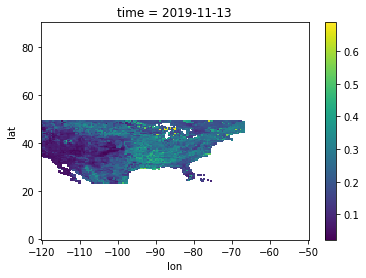

In [15]:
coordinates = podpac.Coordinates([podpac.clinspace(0, 90, 180), podpac.clinspace(-120,-50, 180), '2019-11-13'], ['lat', 'lon', 'time'])

# this will work
node = aws.Lambda(source=smap, eval_settings=eval_settings)
output = node.eval(coordinates)
output.plot()
pass

In [44]:
settings["FUNCTION_NAME"] = "podpac-drought-monitor-lambda-smap-updater"
settings["S3_BUCKET_NAME"] = "podpac-drought-monitor-s3"
settings["FUNCTION_ROLE_NAME"] = "podpac-drought-monitor-role"

Load the pipelines

Make the Lambda function

In [45]:
# make lambda node that is restricted only to this node
updater_node = aws.Lambda(function_tags={'owner': 'mpu',
                                 'acct': '1010115.01.003'}, 
                 function_source_bucket=settings["S3_BUCKET_NAME"],
                 function_source_dist_key='podpac-dm-smap-updater_dist.zip',
                 function_env_variables={"S3_BUCKET_NAME": settings["S3_BUCKET_NAME"],
                                         "PODPAC_VERSION": podpac.version.semver()
                                        }                  
                 )
updater_node.describe()


Lambda Node (staged)
    Function
        Name: podpac-drought-monitor-lambda-smap-updater
        Description: PODPAC Lambda Function (https://podpac.org)
        ARN: None
        Triggers: ['eval']
        Handler: handler.handler
        Environment Variables: {'S3_BUCKET_NAME': 'podpac-drought-monitor-s3', 'PODPAC_VERSION': '1.2.0'}
        Timeout: 600 seconds
        Memory: 2048 MB
        Tags: {'owner': 'mpu', 'acct': '1010115.01.003'}
        Source Dist: s3://podpac-drought-monitor-s3/podpac-dm-smap-updater_dist.zip
        Source Dependencies: s3://podpac-drought-monitor-s3/dev/podpac_deps.zip
        Last Modified: None
        Version: None
        Restrict Evaluation: []

    S3
        Bucket: podpac-drought-monitor-s3
        Tags: {'owner': 'mpu', 'acct': '1010115.01.003'}
        Input Folder: input/
        Output Folder: output/

    Role
        Name: podpac-drought-monitor-role
        Description: PODPAC Lambda Role
        ARN: None
        Policy Document: {

In [49]:
updater_node.delete_function()
updater_node.build()

DEBUG:podpac.core.managers.aws:Getting lambda function podpac-drought-monitor-lambda-smap-updater
DEBUG:podpac.core.managers.aws:Getting lambda function podpac-drought-monitor-lambda-smap-updater
DEBUG:podpac.core.managers.aws:Removing lambda function 'podpac-drought-monitor-lambda-smap-updater'
DEBUG:podpac.core.managers.aws:Removed lambda function 'podpac-drought-monitor-lambda-smap-updater'
DEBUG:podpac.core.managers.aws:Getting IAM role with name podpac-drought-monitor-role
DEBUG:podpac.core.managers.aws:Getting lambda function podpac-drought-monitor-lambda-smap-updater
DEBUG:podpac.core.managers.aws:Failed to get lambda function podpac-drought-monitor-lambda-smap-updater with exception: An error occurred (ResourceNotFoundException) when calling the GetFunction operation: Function not found: arn:aws:lambda:us-east-1:120507435541:function:podpac-drought-monitor-lambda-smap-updater
DEBUG:podpac.core.managers.aws:Skipping API get because 'APIGateway' not in the function triggers
DEBUG

In [50]:
1+1

2